# Data Understanding/ Slight Preprocessing

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('nursing_homes.csv')
dataset.shape


(15082, 29)

In [142]:
mean_val=dataset.mean()

C:\Users\ashwi\AppData\Local\Temp/ipykernel_32716/2340698465.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_val=dataset.mean()


In [143]:
dataset['special_focus_status']=dataset['special_focus_status'].fillna(value='No')

In [144]:
dataset=dataset.fillna(value=mean_val)

In [145]:
grouped=dataset.groupby(['provider_state'])
avg=grouped['overall_rating'].mean()
type(avg)

pandas.core.series.Series

Text(0, 0.5, 'Average Rating per state')

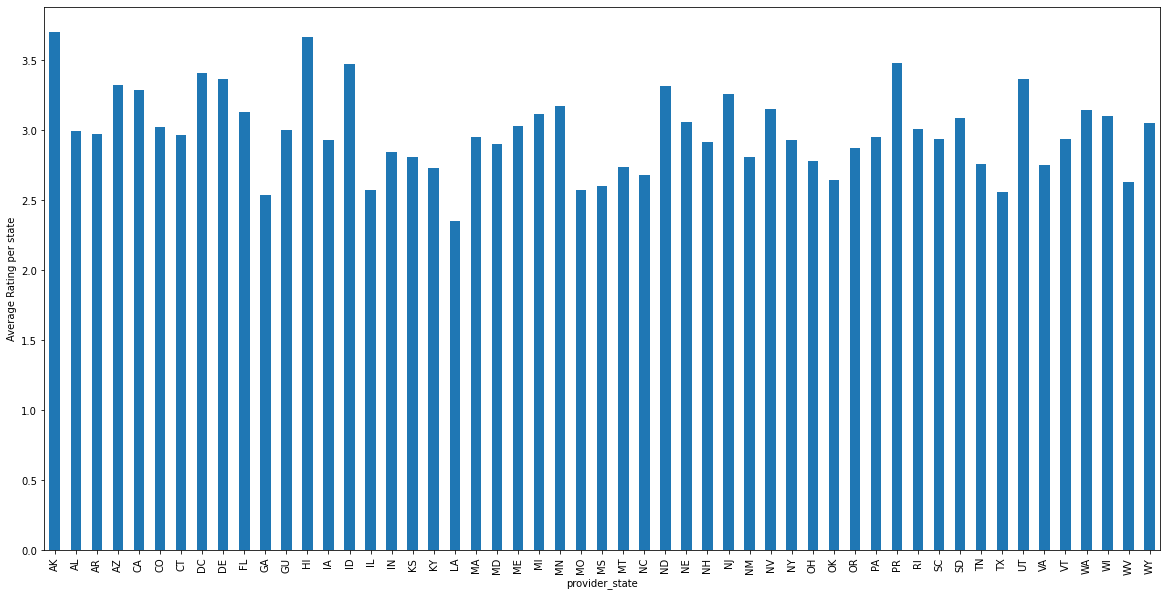

In [146]:
avg.plot(kind='bar',figsize=(20,10))
plt.ylabel("Average Rating per state")

In [147]:
dataset['provider_state'].value_counts()

TX    1201
CA    1174
OH     949
FL     699
IL     698
PA     676
NY     608
IN     522
MO     512
MI     431
IA     425
NC     422
GA     358
MN     354
MA     354
NJ     351
WI     337
KS     316
TN     311
OK     293
VA     289
KY     278
LA     269
AL     225
MD     225
AR     218
CO     218
CT     205
MS     203
WA     199
SC     188
NE     186
AZ     143
OR     129
WV     123
SD      98
UT      98
ME      88
ID      80
ND      78
RI      75
NH      73
MT      70
NM      68
NV      65
HI      43
DE      43
VT      35
WY      35
AK      20
DC      17
PR       6
GU       1
Name: provider_state, dtype: int64

                                     number_of_certified_beds  \
number_of_certified_beds                             1.000000   
average_number_of_residents_per_day                  0.897722   

                                     average_number_of_residents_per_day  
number_of_certified_beds                                        0.897722  
average_number_of_residents_per_day                             1.000000  


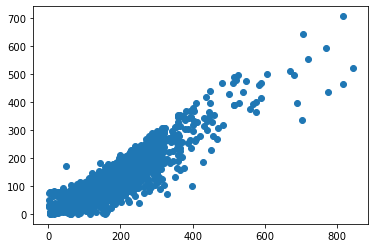

In [148]:
plt.scatter(dataset['number_of_certified_beds'],dataset['average_number_of_residents_per_day'])
subset=dataset[['number_of_certified_beds','average_number_of_residents_per_day']]
print(subset.corr())
plt.show()

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['abuse_icon']=le.fit_transform(dataset['abuse_icon'])

Text(0, 0.5, 'Percentage of Homes Labeled with Abuse Icon')

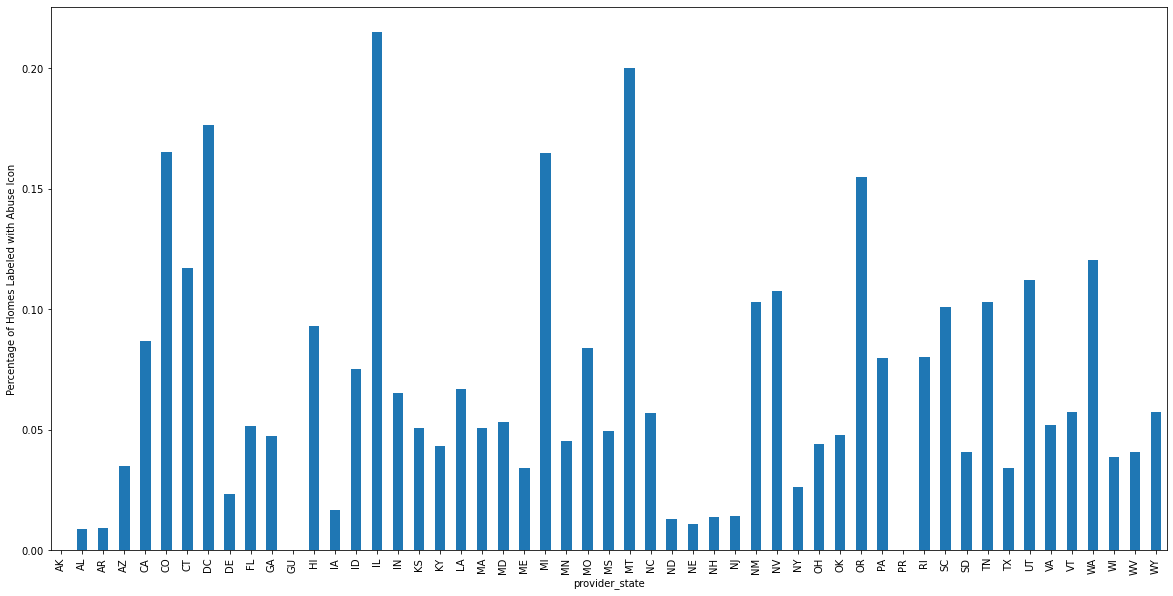

In [150]:
abuse=dataset.groupby(['provider_state']).mean()
abuse['abuse_icon'].plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage of Homes Labeled with Abuse Icon')

Text(0, 0.5, 'Number of homes')

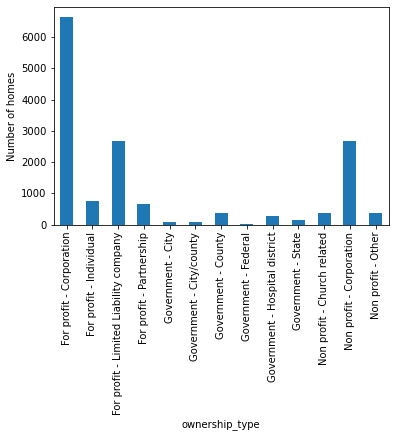

In [151]:
ownership=dataset.groupby('ownership_type')
ownership['ownership_type'].count().plot(kind='bar')
plt.ylabel("Number of homes")

# Finish Preprocessing

In [152]:
reco_system_data=dataset.copy()
reco_system_data.shape

(15082, 29)

In [153]:
reco_system_data=reco_system_data.drop(['provider_state','provider_zip_code','ownership_type','provider_type'],axis=1)
reco_system_data.shape

(15082, 25)

In [154]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_licensed_staffing_hours_per_resident_per_day,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties
0,"BURNS NURSING HOME, INC.",57,53.8,N,N,No,0,Y,Both,Yes,...,1.534099,3.751303,0.447687,0.795204,0,0,0.0,1,0,1
1,COOSA VALLEY HEALTHCARE CENTER,85,77.8,N,N,No,0,N,Resident,Yes,...,1.674840,4.249370,0.463990,0.795204,0,0,0.0,1,0,1
2,HIGHLANDS HEALTH AND REHAB,50,36.1,N,N,No,0,N,Resident,Yes,...,2.001370,4.697610,0.494640,0.795204,0,0,0.0,0,0,0
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,92,73.3,N,N,No,0,Y,Both,Yes,...,1.014140,2.365710,0.439390,0.795204,0,0,0.0,0,0,0
4,PLANTATION MANOR NURSING HOME,103,84.6,N,N,No,0,Y,Resident,Yes,...,1.097920,3.224090,0.145520,1.000000,0,2,0.0,2,0,2


In [155]:
reco_system_data.shape

(15082, 25)

In [156]:
i=LabelEncoder()
reco_system_data['provider_resides_in_hospital']=i.fit_transform(reco_system_data['provider_resides_in_hospital'])

In [157]:
reco_system_data['continuing_care_retirement_community']=i.fit_transform(reco_system_data['continuing_care_retirement_community'])
reco_system_data['special_focus_status']=i.fit_transform(reco_system_data['special_focus_status'])
reco_system_data['most_recent_health_inspection_more_than_2_years_ago']=i.fit_transform(reco_system_data['most_recent_health_inspection_more_than_2_years_ago'])
reco_system_data['with_a_resident_and_family_council']=i.fit_transform(reco_system_data['with_a_resident_and_family_council'])

In [158]:
reco_system_data['automatic_sprinkler_systems_in_all_required_areas']=i.fit_transform(reco_system_data['automatic_sprinkler_systems_in_all_required_areas'])

In [159]:
addon=reco_system_data['overall_rating'].copy()
reco_system_data=reco_system_data.drop('overall_rating',axis=1)
reco_system_data['overall_rating']=addon


In [160]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties,overall_rating
0,"BURNS NURSING HOME, INC.",57,53.8,0,0,0,0,1,0,2,...,3.751303,0.447687,0.795204,0,0,0.0,1,0,1,5.0
1,COOSA VALLEY HEALTHCARE CENTER,85,77.8,0,0,0,0,0,3,2,...,4.249370,0.463990,0.795204,0,0,0.0,1,0,1,4.0
2,HIGHLANDS HEALTH AND REHAB,50,36.1,0,0,0,0,0,3,2,...,4.697610,0.494640,0.795204,0,0,0.0,0,0,0,5.0
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,92,73.3,0,0,0,0,1,0,2,...,2.365710,0.439390,0.795204,0,0,0.0,0,0,0,3.0
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,3.224090,0.145520,1.000000,0,2,0.0,2,0,2,2.0


In [161]:
from sklearn.model_selection import train_test_split
X=reco_system_data.values[:,:-1]
Y=reco_system_data.values[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [162]:
nearest_neighbors_name=x_train[:,0]
x_train=np.delete(x_train,0,axis=1)
x_test=np.delete(x_test,0,axis=1)

In [163]:
nearest_neighbors_name

array(["ODD FELLOWS & REBEKAHS' HOME OF MAINE", 'KOESTER PAVILION',
       'CARLTON AT THE LAKE, THE', ..., 'ARBORS AT MINERVA',
       'MILTON FREEWATER HEALTH AND REHABILITATION CENTER',
       'WESTMINSTER COMMONS'], dtype=object)

<AxesSubplot:>

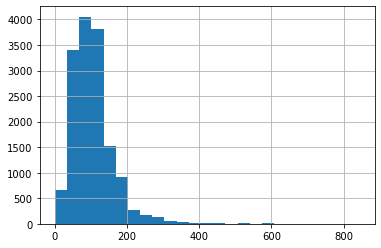

In [164]:
dataset['number_of_certified_beds'].hist(bins=25)

<AxesSubplot:>

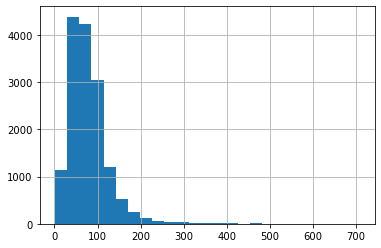

In [165]:
dataset['average_number_of_residents_per_day'].hist(bins=25)

In [166]:
print(reco_system_data.columns)

Index(['provider_name', 'number_of_certified_beds',
       'average_number_of_residents_per_day', 'provider_resides_in_hospital',
       'continuing_care_retirement_community', 'special_focus_status',
       'abuse_icon', 'most_recent_health_inspection_more_than_2_years_ago',
       'with_a_resident_and_family_council',
       'automatic_sprinkler_systems_in_all_required_areas',
       'health_inspection_rating', 'qm_rating', 'staffing_rating',
       'reported_nurse_aide_staffing_hours_per_resident_per_day',
       'reported_licensed_staffing_hours_per_resident_per_day',
       'reported_total_nurse_staffing_hours_per_resident_per_day',
       'registered_nurse_hours_per_resident_per_day_on_the_weekend',
       'number_of_administrators_who_have_left_the_nursing_home',
       'number_of_facility_reported_incidents',
       'number_of_substantiated_complaints',
       'number_of_citations_from_infection_control_inspections',
       'number_of_fines', 'number_of_payment_denials',
      

In [167]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [168]:
print(x_train.shape)

(12065, 23)


In [169]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties,overall_rating
0,"BURNS NURSING HOME, INC.",57,53.8,0,0,0,0,1,0,2,...,3.751303,0.447687,0.795204,0,0,0.0,1,0,1,5.0
1,COOSA VALLEY HEALTHCARE CENTER,85,77.8,0,0,0,0,0,3,2,...,4.249370,0.463990,0.795204,0,0,0.0,1,0,1,4.0
2,HIGHLANDS HEALTH AND REHAB,50,36.1,0,0,0,0,0,3,2,...,4.697610,0.494640,0.795204,0,0,0.0,0,0,0,5.0
3,EASTVIEW REHABILITATION & HEALTHCARE CENTER,92,73.3,0,0,0,0,1,0,2,...,2.365710,0.439390,0.795204,0,0,0.0,0,0,0,3.0
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,3.224090,0.145520,1.000000,0,2,0.0,2,0,2,2.0


# User Based System

In [170]:

from sklearn.neighbors import KNeighborsRegressor

# Creating and training the KNN model
n_neighbors =5
knn = KNeighborsRegressor(n_neighbors=n_neighbors)
knn.fit(x_train, y_train)

# Finding the n nearest neighbors for each test data point
distances, indices = knn.kneighbors(x_test)
#each gives 2-D array of distances or indices per test point

# At last Getting the actual data points (nursing home names) of the nearest neighbors
nearest_neighbors_data = nearest_neighbors_name[indices]
#2-D array as well
# Print the nearest neighbors' data and their corresponding distances for each test data point

for i in range(len(x_test)):
    print(f"Test data point {i + 1}:")
    print("Nearest Neighbors:")
    for j in range(n_neighbors):
        print(f"{j + 1}. {nearest_neighbors_data[i, j]} (Distance: {distances[i, j]:.2f})")
    print()

Test data point 1:
Nearest Neighbors:
1. GLEN RIDGE NURSING CARE CENTER (Distance: 3.58)
2. AVAMERE HEALTH SERVICES OF ROGUE VALLEY (Distance: 3.60)
3. APOPKA HEALTH AND REHABILITATION CENTER (Distance: 3.61)
4. MONTICELLO CARE CENTER (Distance: 3.76)
5. PARKWAY HEALTH AND REHABILITATION CENTER (Distance: 3.76)

Test data point 2:
Nearest Neighbors:
1. NEW VISTA POST- ACUTE CARE CENTER (Distance: 1.14)
2. LEISURE GLEN POST ACUTE CARE CENTER (Distance: 1.15)
3. RIVIERA PALMS REHABILITATION CENTER (Distance: 1.25)
4. CALIFORNIA POST-ACUTE CARE (Distance: 1.30)
5. STERLING OAKS REHABILITATION (Distance: 1.35)

Test data point 3:
Nearest Neighbors:
1. PARK BEND HEALTH CENTER (Distance: 0.98)
2. LIBERTY HEALTH CARE CENTER INC (Distance: 1.14)
3. PEACE HEALTHCARE AT MOUNTAIN CITY (Distance: 1.19)
4. GEM CITY HEALTHCARE AND REHABILITATION CENTER (Distance: 1.21)
5. REGENCY CARE OF SILVER SPRING, LLC (Distance: 1.25)

Test data point 4:
Nearest Neighbors:
1. SPRUCE MANOR NURSING & REHABILITATI

Nearest Neighbors:
1. ROLLING GREEN VILLAGE CARE CEN (Distance: 1.62)
2. BLOOMFIELD CARE CENTER (Distance: 1.74)
3. REHABILITATION CENTER OF LISBON (Distance: 1.77)
4. EMMETSBURG CARE CENTER (Distance: 2.04)
5. CLARU DEVILLE NURSING CENTER (Distance: 2.06)

Test data point 409:
Nearest Neighbors:
1. ANSTED CENTER (Distance: 0.81)
2. CHANDLER NURSING CENTER (Distance: 1.00)
3. BUCHANAN HEALTHCARE CENTER (Distance: 1.25)
4. RETAMA MANOR NURSING CENTER/JOURDANTON (Distance: 1.35)
5. BRIDGEPORT HEALTH CARE CENTER (Distance: 1.35)

Test data point 410:
Nearest Neighbors:
1. SILVER OAKS HEALTH AND REHABILITATION (Distance: 0.96)
2. BAYOU PINES CARE CENTER (Distance: 1.04)
3. MANOR COURT OF PRINCETON (Distance: 1.09)
4. MEDICALODGES BUTLER (Distance: 1.11)
5. MITCHELL'S NURSING HOME, INC (Distance: 1.13)

Test data point 411:
Nearest Neighbors:
1. CRESTMONT NORTH NURSING HOME (Distance: 0.82)
2. GARDENS OF NORTH OLMSTED (Distance: 0.82)
3. DELHI POST-ACUTE (Distance: 0.96)
4. FLORENTINE GARDE

2. PILGRIM REHABILITATION & SKILLED NURSING CENTER (Distance: 1.52)
3. CHEMUNG COUNTY HEALTH CENTER - NURSING FACILITY (Distance: 1.55)
4. HERITAGE HEALTH CARE & REHAB INC (Distance: 1.59)
5. GENERATIONS OF VERNON, LLC (Distance: 1.65)

Test data point 742:
Nearest Neighbors:
1. ROYAL PARK HEALTH AND REHABILITATION (Distance: 1.40)
2. ASHTON PLACE HEALTH AND REHAB, LLC (Distance: 1.41)
3. VILLAGES OF JACKSON CREEK, THE (Distance: 1.54)
4. HAMPTON COURT NURSING AND REHABILITATION CENTER (Distance: 1.64)
5. BRIDGEWATER HOME , INC. (Distance: 1.70)

Test data point 743:
Nearest Neighbors:
1. FOXDALE VILLAGE (Distance: 0.68)
2. CALVARY FELLOWSHIP HOMES INC (Distance: 0.90)
3. SKILLED NURSING AT FELLOWSHIP VILLAGE (Distance: 0.91)
4. THE WATERMARK AT BELLINGHAM PARK LANE (Distance: 1.04)
5. ELIZABETH SCOTT COMMUNITY (Distance: 1.12)

Test data point 744:
Nearest Neighbors:
1. OLYMPIA CONVALESCENT HOSPITAL (Distance: 1.73)
2. CALIFORNIA POST ACUTE (Distance: 1.96)
3. COUNTRY VILLA PAVILION N

Test data point 1069:
Nearest Neighbors:
1. LAKE PARK OF MADISON NURSING AND REHABILITATION CE (Distance: 1.16)
2. NYE LEGACY HEALTH & REHABILITATION CENTER (Distance: 1.29)
3. SULLIVAN COUNTY HEALTH CARE (Distance: 1.33)
4. ST JOSEPH'S HOSPITAL - SKILLED NURSING FACILITY (Distance: 1.45)
5. ST. CAMILLUS POST-ACUTE AND REHABILITATION CENTER (Distance: 1.52)

Test data point 1070:
Nearest Neighbors:
1. PROMEDICA SKILLED NURSING AND REHAB MIAMISBURG (Distance: 1.97)
2. UNIVERSAL HEALTH CARE/KING (Distance: 2.13)
3. THE EMERALDS AT GRAND RAPIDS LLC (Distance: 2.19)
4. NANS POINTE REHABILITATION AND NURSING (Distance: 2.20)
5. PROMEDICA SKILLED NURSING & REHAB WESTERVILLE (Distance: 2.21)

Test data point 1071:
Nearest Neighbors:
1. VILLA AT WINDSOR PARK (Distance: 1.61)
2. HUDSON PARK REHABILITATION AND NURSING CENTER (Distance: 1.94)
3. ANNANDALE  HEALTHCARE CENTER (Distance: 2.09)
4. SUNNYVIEW NURSING AND REHABILITATION CENTER (Distance: 2.21)
5. ST JOHNLAND NURSING CENTER INC (Distance

Nearest Neighbors:
1. MANATEE SPRINGS REHABILITATION AND NURSING CENTER (Distance: 1.11)
2. CASSENA CARE AT STAMFORD (Distance: 1.24)
3. AUTUMN LAKE HEALTHCARE AT MEMORIAL BRIDGE (Distance: 1.31)
4. HUNTINGTON POST ACUTE (Distance: 1.33)
5. ALAMITOS WEST HEALTH & REHABILITATION (Distance: 1.35)

Test data point 1416:
Nearest Neighbors:
1. REGENCY PARK NURSING & REHAB CENTER OF JEFFERSON (Distance: 1.58)
2. ANEW HEALTHCARE (Distance: 1.64)
3. ALLURE OF PROPHETSTOWN (Distance: 1.75)
4. WINDWARD GARDENS (Distance: 1.79)
5. DIVERSICARE OF DOVER (Distance: 1.81)

Test data point 1417:
Nearest Neighbors:
1. PROMEDICA SKILLED NURSING AND REHAB (SPOKANE) (Distance: 2.20)
2. BRADENTON HEALTH CARE (Distance: 2.82)
3. CROSS TIMBERS REHABILITATION AND HEALTHCARE CENTER (Distance: 3.08)
4. ALDERCREST HEALTH & REHAB CENTER (Distance: 3.09)
5. FRANK M TEJEDA TEXAS STATE VETERANS HOME (Distance: 3.17)

Test data point 1418:
Nearest Neighbors:
1. DADE CITY HEALTH AND REHABILITATION CENTER (Distance: 1.

Nearest Neighbors:
1. CADIA REHABILITATION CAPITOL (Distance: 0.76)
2. METHODIST HOME FOR NURSING AND REHABILITATION (Distance: 0.86)
3. CARE ONE AT TEANECK (Distance: 1.09)
4. AVANTE VILLA AT JACKSONVILLE BEACH INC (Distance: 1.10)
5. COPLEY AT STOUGHTON NURSING CARE CENTER (Distance: 1.12)

Test data point 1758:
Nearest Neighbors:
1. PARKWAY OPERATOR LLC (Distance: 1.20)
2. GOOD SAMARITAN SOCIETY - HAYS (Distance: 1.38)
3. BELMONT MANOR (Distance: 1.40)
4. WELLS LTC PARTNERS INC (Distance: 1.41)
5. LEGACY AT HERINGTON (Distance: 1.50)

Test data point 1759:
Nearest Neighbors:
1. HUDSON HILLS SENIOR LIVING, LLC (Distance: 3.48)
2. PRAIRIE MISSION RETIREMENT VILLAGE (Distance: 3.53)
3. THE LEGACY MIDTOWN PARK (Distance: 3.84)
4. SUMMER COMMONS (Distance: 4.03)
5. TREEMONT HEALTH CARE CENTER (Distance: 4.33)

Test data point 1760:
Nearest Neighbors:
1. ELIM WELLSPRING (Distance: 2.83)
2. ROO LAN HEALTH & REHAB (Distance: 2.96)
3. RICHMOND BEACH REHAB (Distance: 3.00)
4. CANTERBURY HOUSE

5. AUTUMN CARE OF MECHANICSVILLE (Distance: 1.41)

Test data point 2170:
Nearest Neighbors:
1. SHEPHERD OF THE VALLEY HOWLAND (Distance: 1.76)
2. HUBBARD HILL ESTATES INC (Distance: 2.07)
3. WESTMINSTER AT LAKE RIDGE (Distance: 2.11)
4. SWIFT CREEK HEALTH CENTER (Distance: 2.20)
5. LODGE AT CYPRESS COVE, THE (Distance: 2.37)

Test data point 2171:
Nearest Neighbors:
1. RIVERSIDE PLACE (Distance: 1.51)
2. BEDROCKHC AT SPRING MEADOWS, LLC (Distance: 1.52)
3. PROMEDICA SKILLED NURSING AND REHAB (TICE VALLEY) (Distance: 1.56)
4. SELF SKILLED NURSING & REHAB (Distance: 1.60)
5. MISSION SKILLED NURSING & SUBACUTE CENTER (Distance: 1.69)

Test data point 2172:
Nearest Neighbors:
1. RENAISSANCE PAVILION (Distance: 4.35)
2. OAKMONT CENTER FOR NURSING & REHABILITATION (Distance: 5.24)
3. FAITH LUTHERAN HOME (Distance: 5.27)
4. PALO DURO NURSING HOME (Distance: 5.31)
5. MESUN HEALTH AND REHABILITATION CENTER (Distance: 5.39)

Test data point 2173:
Nearest Neighbors:
1. MASON POINTE CARE CENTER (D

Test data point 2518:
Nearest Neighbors:
1. GREENVILLE NURSING AND REHABILITATION (Distance: 1.20)
2. ELSBERRY MISSOURI HEALTH CARE CENTER (Distance: 1.20)
3. REHABILITATION AND NURSING CENTER OF THE ROCKIES (Distance: 1.29)
4. SPRING VIEW NURSING & REHABILITATION (Distance: 1.41)
5. DIVERSICARE OF TYLERTOWN (Distance: 1.50)

Test data point 2519:
Nearest Neighbors:
1. WILLOW PASS HEALTHCARE CENTER (Distance: 1.75)
2. GOOD SAMARITAN SOCIETY - LIBERAL (Distance: 1.88)
3. OSAGE BEACH REHABILITATION AND HEALTH CARE CENTER (Distance: 1.91)
4. COLUMBIA MANOR CARE CENTER (Distance: 1.91)
5. AHVA CARE OF STICKNEY (Distance: 2.08)

Test data point 2520:
Nearest Neighbors:
1. WESLEY PINES RETIREMENT COMM (Distance: 1.09)
2. KIRKWOOD BY THE RIVER (Distance: 1.27)
3. AZRIA HEALTH LONGVIEW (Distance: 1.29)
4. ORANGE PARK REHABILITATION AND NURSING CENTER (Distance: 1.31)
5. HILLSIDE VILLAGE OF DE SOTO (Distance: 1.34)

Test data point 2521:
Nearest Neighbors:
1. WOODLAND HILLS HEALTHCARE AND REHAB

1. SUNPORCH OF DODGE CITY (Distance: 1.11)
2. PRAIRIE VIEW SENIOR LIVING (Distance: 1.21)
3. EUREKA NURSING CENTER (Distance: 1.22)
4. HICKORY CREEK AT COLUMBUS (Distance: 1.28)
5. STONEYBROOK RETIREMENT COMMUNITY (Distance: 1.29)

Test data point 2843:
Nearest Neighbors:
1. CABOT HEALTH AND REHAB, LLC (Distance: 1.77)
2. AZRIA HEALTH REGENCY SQUARE (Distance: 1.83)
3. HUNTINGTON PARK NURSING CENTER (Distance: 1.84)
4. ST VINCENT'S - A PROSPERA COMMUNITY (Distance: 1.88)
5. BEDFORD CARE CENTER OF MARION (Distance: 1.90)

Test data point 2844:
Nearest Neighbors:
1. PRESCOTT HOUSE (Distance: 1.42)
2. GRAND OAKS HEALTH AND REHABILITATION CENTER (Distance: 1.91)
3. BLUEBERRY HILL REHABILITATION AND HEALTHCARE CTR (Distance: 2.04)
4. BROOKVIEW A VILLA CENTER (Distance: 2.16)
5. WINGATE AT SILVER LAKE (Distance: 2.42)

Test data point 2845:
Nearest Neighbors:
1. CORDOVA COMMUNITY MED LTC (Distance: 1.87)
2. ADVENTHEALTH DADE CITY (Distance: 2.28)
3. KAWEAH HEALTH SKILLED NURSING CENTER (Dist

In [171]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr


# First Finding the n nearest neighbors for each test data point
distances, indices = knn.kneighbors(x_test)

# Then Getting the actual data points (nursing home names) of the nearest neighbors
nearest_neighbors_data = nearest_neighbors_name[indices]

# Calculating the Pearson correlation coefficients between each neighbor and test point
pearson_correlations = np.zeros((x_test.shape[0], n_neighbors))

for i in range(x_test.shape[0]):
    for j in range(n_neighbors):
        pearson_correlations[i, j], _ = pearsonr(x_test[i], x_train[indices[i, j]])

# Printing the nearest neighbors' data, distances, and Pearson correlation coefficients for each test data point
for i in range(len(x_test)):
    print(f"Test data point {i + 1}:")
    print("Nearest Neighbors:")
    for j in range(n_neighbors):
        print(f"{j + 1}. {nearest_neighbors_data[i, j]} (Distance: {distances[i, j]:.2f}, Pearson correlation: {pearson_correlations[i, j]:.2f})")
    print()


Test data point 1:
Nearest Neighbors:
1. GLEN RIDGE NURSING CARE CENTER (Distance: 3.58, Pearson correlation: 0.90)
2. AVAMERE HEALTH SERVICES OF ROGUE VALLEY (Distance: 3.60, Pearson correlation: 0.89)
3. APOPKA HEALTH AND REHABILITATION CENTER (Distance: 3.61, Pearson correlation: 0.89)
4. MONTICELLO CARE CENTER (Distance: 3.76, Pearson correlation: 0.91)
5. PARKWAY HEALTH AND REHABILITATION CENTER (Distance: 3.76, Pearson correlation: 0.90)

Test data point 2:
Nearest Neighbors:
1. NEW VISTA POST- ACUTE CARE CENTER (Distance: 1.14, Pearson correlation: 0.88)
2. LEISURE GLEN POST ACUTE CARE CENTER (Distance: 1.15, Pearson correlation: 0.84)
3. RIVIERA PALMS REHABILITATION CENTER (Distance: 1.25, Pearson correlation: 0.86)
4. CALIFORNIA POST-ACUTE CARE (Distance: 1.30, Pearson correlation: 0.89)
5. STERLING OAKS REHABILITATION (Distance: 1.35, Pearson correlation: 0.86)

Test data point 3:
Nearest Neighbors:
1. PARK BEND HEALTH CENTER (Distance: 0.98, Pearson correlation: 0.96)
2. LIB


Test data point 270:
Nearest Neighbors:
1. LAKE SHORE VILLAGE HEALTHCARE CENTER (Distance: 2.37, Pearson correlation: 0.93)
2. WELLSTAR PAULDING NURSING CTR (Distance: 2.68, Pearson correlation: 0.90)
3. UNION COUNTY NURSING HOME (Distance: 2.84, Pearson correlation: 0.89)
4. NEW HORIZONS LIMESTONE (Distance: 2.85, Pearson correlation: 0.89)
5. AURELIA OSBORN FOX MEMORIAL HOSPITAL (Distance: 2.94, Pearson correlation: 0.87)

Test data point 271:
Nearest Neighbors:
1. WATERS OF BATESVILLE, THE (Distance: 0.70, Pearson correlation: 0.92)
2. WESTRIDGE HEALTH CARE CENTER (Distance: 0.79, Pearson correlation: 0.93)
3. URBANA HEALTH & REHABILITATION CENTER (Distance: 0.89, Pearson correlation: 0.89)
4. LEVELLAND NURSING & REHABILITATION CENTER (Distance: 1.05, Pearson correlation: 0.84)
5. KIRKLAND COURT HEALTH AND REHABILITATION CENTER (Distance: 1.08, Pearson correlation: 0.83)

Test data point 272:
Nearest Neighbors:
1. LAKE PARK OF MADISON NURSING AND REHABILITATION CE (Distance: 1.13, 

5. WESTPORT PLACE HEALTH CAMPUS (Distance: 2.13, Pearson correlation: 0.75)

Test data point 584:
Nearest Neighbors:
1. LAURELS OF GALESBURG (THE) (Distance: 3.75, Pearson correlation: 0.90)
2. WESTVIEW HEALTHCARE CENTER (Distance: 3.76, Pearson correlation: 0.91)
3. POINSETT REHABILITATION AND HEALTHCARE CENTER (Distance: 4.24, Pearson correlation: 0.86)
4. MISSION POINT NSG & PHY REHAB CTR OF FLINT (Distance: 4.29, Pearson correlation: 0.86)
5. THE ORCHARDS AT ROSEVILLE (Distance: 4.36, Pearson correlation: 0.89)

Test data point 585:
Nearest Neighbors:
1. PROVIDENCE LITTLE CO OF MARY TRANSITIONAL CARE CTR (Distance: 2.41, Pearson correlation: 0.97)
2. MOUNT SINAI SOUTH NASSAU T C U (Distance: 2.78, Pearson correlation: 0.96)
3. TRANSITIONAL CARE SERVICES AT MERCY MEDICAL CENTER (Distance: 2.82, Pearson correlation: 0.97)
4. CALIFORNIA PACIFIC MEDICAL CTR- DAVIES CAMPUS HOSP (Distance: 3.40, Pearson correlation: 0.96)
5. EMANATE HEALTH INTER-COMMUNITY HOSPITAL- D/P SNF (Distance: 3.4

3. LEONARD FLORENCE CENTER FOR LIVING (Distance: 0.77, Pearson correlation: 0.94)
4. AYERS HEALTH AND REHABILITATION CENTER (Distance: 0.78, Pearson correlation: 0.94)
5. PALOMAR HEIGHTS POST ACUTE REHAB (Distance: 0.85, Pearson correlation: 0.92)

Test data point 962:
Nearest Neighbors:
1. MARY MANNING WALSH NURSING HOME CO INC (Distance: 3.16, Pearson correlation: 0.93)
2. HILLSIDE MANOR REHAB & EXTENDED CARE CENTER (Distance: 3.19, Pearson correlation: 0.93)
3. SILVERCREST (Distance: 3.49, Pearson correlation: 0.91)
4. QUEENS BOULEVARD EXTENDED CARE FACILITY (Distance: 3.73, Pearson correlation: 0.93)
5. GLENDORA GRAND, INC (Distance: 3.81, Pearson correlation: 0.89)

Test data point 963:
Nearest Neighbors:
1. SENIOR CARE BELTLINE (Distance: 2.36, Pearson correlation: 0.85)
2. NATURE TRAIL HEALTH AND REHAB (Distance: 2.59, Pearson correlation: 0.87)
3. WHITE PINE CARE CENTER (Distance: 2.71, Pearson correlation: 0.85)
4. HERITAGE HEALTH-MOUNT STERLING (Distance: 2.77, Pearson correl


Test data point 1263:
Nearest Neighbors:
1. KERR LAKE NURSING AND REHABILITATION CENTER (Distance: 0.92, Pearson correlation: 0.90)
2. ADAMS FARM LIVING & REHABILITATION (Distance: 1.00, Pearson correlation: 0.89)
3. ELIZA JENNINGS HOME (Distance: 1.02, Pearson correlation: 0.89)
4. LAKE BENNET CENTER FOR REHABILITATION & HEALING (Distance: 1.04, Pearson correlation: 0.88)
5. WAYNE CENTER (Distance: 1.11, Pearson correlation: 0.86)

Test data point 1264:
Nearest Neighbors:
1. SPRINGBROOK NURSING & REHABILITATION  CENTER (Distance: 1.72, Pearson correlation: 0.90)
2. LINCOLNSHIRE HEALTH & REHABILITATION CENTER (Distance: 1.86, Pearson correlation: 0.91)
3. PEARL PAVILION (Distance: 1.92, Pearson correlation: 0.88)
4. THE MEDICAL RESORT AT SUGAR LAND (Distance: 2.07, Pearson correlation: 0.89)
5. HIGHLAND SQUARE NURSING AND REHABILITATION (Distance: 2.11, Pearson correlation: 0.87)

Test data point 1265:
Nearest Neighbors:
1. WARREN PARK HEALTH & LIVING CTR (Distance: 1.60, Pearson corr

Nearest Neighbors:
1. BROOKWOOD RETIREMENT COMMUNITY (Distance: 2.90, Pearson correlation: 0.84)
2. MILLER'S MERRY MANOR (Distance: 2.91, Pearson correlation: 0.84)
3. CREEKSIDE CENTER FOR REHABILITATION AND NURSING (Distance: 3.01, Pearson correlation: 0.83)
4. HEALTH CARE CENTER LUCY CORR (Distance: 3.02, Pearson correlation: 0.84)
5. AUGSBURG VILLAGE (Distance: 3.04, Pearson correlation: 0.83)

Test data point 1624:
Nearest Neighbors:
1. SITTER AND BARFOOT VETERANS CARE CENTER (Distance: 2.70, Pearson correlation: 0.85)
2. ROMAN EAGLE REHABILITATION AND HEALTH CARE CENTER (Distance: 2.71, Pearson correlation: 0.84)
3. MIAMI SPRINGS NURSING AND REHABILITATION CENTER (Distance: 2.72, Pearson correlation: 0.85)
4. RIVERSIDE REST HOME (Distance: 2.78, Pearson correlation: 0.84)
5. WI VETERANS HM AINSWORTH HALL (Distance: 2.91, Pearson correlation: 0.83)

Test data point 1625:
Nearest Neighbors:
1. ADVINIACARE NEWBURYPORT (Distance: 1.44, Pearson correlation: 0.92)
2. AERIUS HEALTH CENTE

Nearest Neighbors:
1. HERITAGE HALL DILLWYN (Distance: 1.27, Pearson correlation: 0.90)
2. PRUITTHEALTH - TOOMSBORO (Distance: 1.27, Pearson correlation: 0.87)
3. PRUITTHEALTH - WASHINGTON (Distance: 1.30, Pearson correlation: 0.92)
4. HICKORY CREEK AT CONNERSVILLE (Distance: 1.35, Pearson correlation: 0.86)
5. PRUITTHEALTH - FORSYTH (Distance: 1.36, Pearson correlation: 0.85)

Test data point 1972:
Nearest Neighbors:
1. SAYBROOK LANDING (Distance: 1.47, Pearson correlation: 0.84)
2. JEFFERSON HEALTHCARE CENTER (Distance: 1.48, Pearson correlation: 0.79)
3. EMERALD HEALTH & REHAB CENTER (Distance: 1.49, Pearson correlation: 0.75)
4. GREENBRIER NURSING & REHABILITATION CENTER OF TYLE (Distance: 1.53, Pearson correlation: 0.82)
5. CEDAR VALLEY NSG & REHAB CTR (Distance: 1.55, Pearson correlation: 0.80)

Test data point 1973:
Nearest Neighbors:
1. HUDSON BAY HEALTH AND REHABILITATION (Distance: 1.55, Pearson correlation: 0.90)
2. OAKVIEW NURSING AND REHABILITATION (Distance: 1.90, Pearson

4. FOCUSED CARE AT HOGAN PARK (Distance: 1.46, Pearson correlation: 0.85)
5. HEARDMONT HEALTH AND REHABILITATION (Distance: 1.56, Pearson correlation: 0.83)

Test data point 2336:
Nearest Neighbors:
1. TRINITY GLEN (Distance: 1.15, Pearson correlation: 0.91)
2. MOUNTAIN VIEW MANOR NURSING CE (Distance: 1.22, Pearson correlation: 0.91)
3. AVANTARA HURON (Distance: 1.31, Pearson correlation: 0.90)
4. MADIGAN ESTATES (Distance: 1.31, Pearson correlation: 0.88)
5. MOORE-FEW CARE CENTER (Distance: 1.33, Pearson correlation: 0.88)

Test data point 2337:
Nearest Neighbors:
1. MEADOWBROOK CARE CENTER (Distance: 1.90, Pearson correlation: 0.96)
2. RIVERVIEW HEALTHCARE CENTER (Distance: 1.91, Pearson correlation: 0.97)
3. DELLS NURSING AND REHAB CENTER INC (Distance: 2.07, Pearson correlation: 0.96)
4. SERENE MANOR MEDICAL CTR. (Distance: 2.18, Pearson correlation: 0.95)
5. NEW LONDON SPECIALTY CARE (Distance: 2.21, Pearson correlation: 0.95)

Test data point 2338:
Nearest Neighbors:
1. BROOKSID

Nearest Neighbors:
1. ST MONICA CENTER FOR REHABILITATION & HEALTHCARE (Distance: 1.70, Pearson correlation: 0.93)
2. DELHI REHABILITATION AND NURSING CENTER (Distance: 1.73, Pearson correlation: 0.92)
3. HARVEST MANOR HEALTHCARE AND REHABILITATION CENTER (Distance: 1.89, Pearson correlation: 0.90)
4. CHATEAU LIVING CENTER (Distance: 1.91, Pearson correlation: 0.92)
5. NORFOLK HEALTH AND REHABILITATION CENTER (Distance: 1.93, Pearson correlation: 0.91)

Test data point 2661:
Nearest Neighbors:
1. ALLIANCE HEALTH AT MAPLES (Distance: 1.23, Pearson correlation: 0.95)
2. BROOKWOOD SKILLED NURSING AND THERAPY (Distance: 1.66, Pearson correlation: 0.92)
3. PROMEDICA SKILLED NURSING AND REHAB- WILMINGTON (Distance: 1.69, Pearson correlation: 0.91)
4. PROMEDICA SKILLED NURSING & REHAB ( POTOMAC) (Distance: 1.71, Pearson correlation: 0.91)
5. KINGSTON CARE CENTER OF SYLVANIA (Distance: 1.79, Pearson correlation: 0.89)

Test data point 2662:
Nearest Neighbors:
1. OAKNOLL RETIREMENT RESIDENCE (D

Test data point 2990:
Nearest Neighbors:
1. ASPIRE OF SUTHERLAND (Distance: 3.90, Pearson correlation: 0.89)
2. ROCHESTER COMMUNITY NURSING AND REHABILITATION CTR (Distance: 4.19, Pearson correlation: 0.86)
3. GOOD SHEPHERD VILLAGE (Distance: 4.21, Pearson correlation: 0.89)
4. PALO DURO NURSING HOME (Distance: 4.34, Pearson correlation: 0.88)
5. ASPIRE OF PERRY (Distance: 4.39, Pearson correlation: 0.88)

Test data point 2991:
Nearest Neighbors:
1. OASIS PAVILION NURSING & REHABILITATION CENTER (Distance: 1.99, Pearson correlation: 0.96)
2. MEADOWBROOK AT OCONTO FALLS (Distance: 2.11, Pearson correlation: 0.97)
3. JOHNSON COUNTY CARE CENTER (Distance: 2.33, Pearson correlation: 0.97)
4. THE OASIS OF GOLFCREST (Distance: 2.54, Pearson correlation: 0.94)
5. ASPIRE OF LAKE PARK (Distance: 2.71, Pearson correlation: 0.94)

Test data point 2992:
Nearest Neighbors:
1. MONTE VISTA ESTATES, LLC (Distance: 2.31, Pearson correlation: 0.88)
2. LINCOLN CRAWFORD CARE CENTER (Distance: 2.45, Pearso

In [172]:
print(indices)

[[ 5803   709  9943  8895  2608]
 [ 7178  3947  3416 11016 10374]
 [ 5802  3917  6752  3565 10774]
 ...
 [11410  6823  2831  6084 10580]
 [ 2832  1403  2684  1896  1031]
 [ 4384   215  2554   399  9856]]


Predict the rating for each test data

In [173]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr

# Getting Pearson Correlation from previous step
# Then Calculating the weighted average of the nearest neighbors' ratings using Pearson correlation coefficients
predicted_ratings = np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):
    average=np.mean(x_test[i])
    weighted_sum = 0
    weight_sum = 0
    for j in range(n_neighbors):
        weighted_sum += ((y_train[indices[i, j]]-np.mean(x_train[indices[i,j]])) * pearson_correlations[i, j])
        weight_sum += abs(pearson_correlations[i, j])
    predicted_ratings[i] = round(average+(weighted_sum / weight_sum))

# Print the nearest neighbors' data, distances, Pearson correlation coefficients, and predicted ratings for each test data point



The difference should be no greater than 1 between actual and predicted for it to be a good rating

In [174]:
good_ratings=0
bad_ratings=0
for i in range(0,len(predicted_ratings)):
    if predicted_ratings[i]-y_test[i]<=1 and predicted_ratings[i]-y_test[i]>=-1:
        good_ratings+=1
    else:
        bad_ratings+=1
print(good_ratings/(good_ratings+bad_ratings))

0.9887305270135897


# Item Based System

In [175]:
x_train_item=np.transpose(x_train)
x_train_item.shape

(23, 12065)

In [176]:
#construct similarity between each of the 23 features, and the y train
from sklearn.metrics.pairwise import cosine_similarity
item_similarity=cosine_similarity(x_train_item,[y_train])
print(item_similarity)
item_similarity=item_similarity.reshape(-1)

[[-0.08152481]
 [-0.06206528]
 [ 0.04837137]
 [ 0.07459483]
 [-0.09023372]
 [-0.11235417]
 [ 0.01941583]
 [-0.02101977]
 [ 0.00516858]
 [ 0.38561231]
 [ 0.20501941]
 [ 0.22849828]
 [ 0.13514515]
 [ 0.14233829]
 [ 0.16559482]
 [ 0.13800981]
 [-0.07686718]
 [-0.09037018]
 [-0.16403834]
 [-0.13859364]
 [-0.11642827]
 [-0.12726907]
 [-0.12727   ]]


In [177]:
print(item_similarity)
test=np.copy(item_similarity)

[-0.08152481 -0.06206528  0.04837137  0.07459483 -0.09023372 -0.11235417
  0.01941583 -0.02101977  0.00516858  0.38561231  0.20501941  0.22849828
  0.13514515  0.14233829  0.16559482  0.13800981 -0.07686718 -0.09037018
 -0.16403834 -0.13859364 -0.11642827 -0.12726907 -0.12727   ]


In [178]:
#get the n greatest item similarities
n_parameter=1
test.sort()
print(test)
n_greatest=test[-n_parameter:]
    

[-0.16403834 -0.13859364 -0.12727    -0.12726907 -0.11642827 -0.11235417
 -0.09037018 -0.09023372 -0.08152481 -0.07686718 -0.06206528 -0.02101977
  0.00516858  0.01941583  0.04837137  0.07459483  0.13514515  0.13800981
  0.14233829  0.16559482  0.20501941  0.22849828  0.38561231]


In [179]:
#Now we find the indices of these item similarities
n_greatest_indices=[]
for i in range(n_parameter):
    for j in range(23):
        if item_similarity[j]==n_greatest[i]:
            n_greatest_indices.append(j)
n_greatest_indices=np.array(n_greatest_indices).reshape(-1)
print(n_greatest_indices)
print(n_greatest)

[9]
[0.38561231]


In [180]:
#For each sample, conduct a predicted rating using similarities from above cells
predictions=[]
x_test_item=sc.inverse_transform(x_test)
denominator=0
for k in range(n_parameter):
    denominator+=n_greatest[k]
 
  # i= current user, cur= n greatest similarity feature rating by user i
for i in range(2085):
    numerator=0
    for j in range(n_parameter):
        cur=n_greatest_indices[j]
        numerator+= (n_greatest[j] * x_test_item[i,cur])
    predictions.append(round(numerator/denominator))

In [181]:
predictions=np.array(predictions).reshape(-1)

In [182]:
good_ratings=0
bad_ratings=0
for i in range(0,len(predictions)):
    if predictions[i]-y_test[i]<=1 and predictions[i]-y_test[i]>=-1:
        good_ratings+=1
    else:
        bad_ratings+=1
print(good_ratings/(good_ratings+bad_ratings))

0.9803357314148681


# Best System: User Based With n_neighbors=5

# Insights

# Goal: Try to find features graphically that might have influenced our system to give a rating that it did

In [183]:
graph_indexes=[]
samples=3017

In [184]:
print(len(graph_indexes))

0


In [185]:
#Find 9 samples, 3 each that had a predicted rating of 1,3, and 5. Add their indices in the list
#must make sure the ratings are accurate as well
iterations=0
for b in range(0,samples):
    iterations+=1
    if len(graph_indexes)==3:
        break
    if predicted_ratings[b]==1 and y_test[b]==1:
        graph_indexes.append(b)
print("This for loops took " + str(iterations) + " iterations")        
 
    
iterations=0
for c in range(0,samples):
    iterations+=1
    if len(graph_indexes)==6:
        break
    if predicted_ratings[c]==5 and y_test[c]==5:
        graph_indexes.append(c)
print("This for loops took " + str(iterations) + " iterations")        


iterations=0
for d in range(0,samples):
    iterations+=1
    if len(graph_indexes)==9:
        break
    if predicted_ratings[d]==3 and y_test[d]==3:
        graph_indexes.append(d)
print("This for loops took " + str(iterations) + " iterations")



print(graph_indexes)


This for loops took 19 iterations
This for loops took 12 iterations
This for loops took 13 iterations
[0, 9, 17, 5, 7, 10, 2, 8, 11]


In [186]:
x_test[0]

array([ 0.50611348,  0.80786788, -0.19454938, -0.34163728,  5.58156248,
        3.67677198, -0.38251574, -2.48417445,  0.03989671, -1.41630274,
       -0.5064039 ,  1.06096193,  0.04526571,  0.05393438,  0.05917732,
       -0.07370154, -0.95745837,  2.1151434 ,  0.14751868, -0.23040121,
        0.17923654, -0.36527908,  0.12449063])

In [187]:
x_test[5]

array([-1.19495073, -1.04500566, -0.19454938, -0.34163728, -0.18719165,
       -0.2719777 ,  2.61427152, -0.52767829,  0.03989671,  1.73043602,
       -1.32178645,  1.81246929,  1.60019054,  5.01598922,  3.936306  ,
        1.63211249, -0.00523989, -0.41655168, -0.50768458, -0.58929716,
       -0.34698049, -0.36527908, -0.37750785])

Not bad of a runtime doing 3 for loops

In [188]:
columns=range(23)

In [192]:
x_test[5,0]

-1.1949507302504747

C:\Users\ashwi\AppData\Local\Temp/ipykernel_32716/2278253305.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


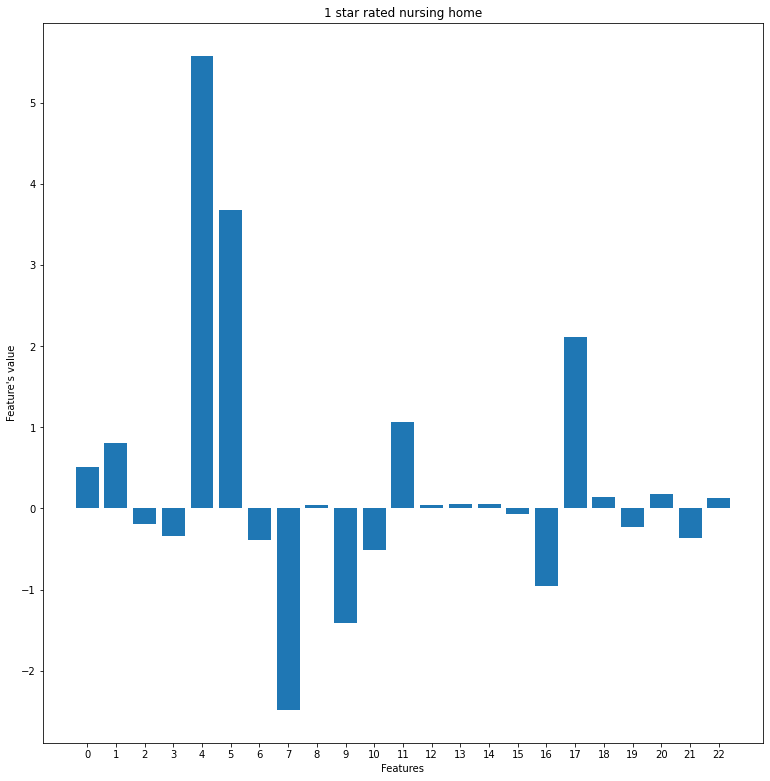

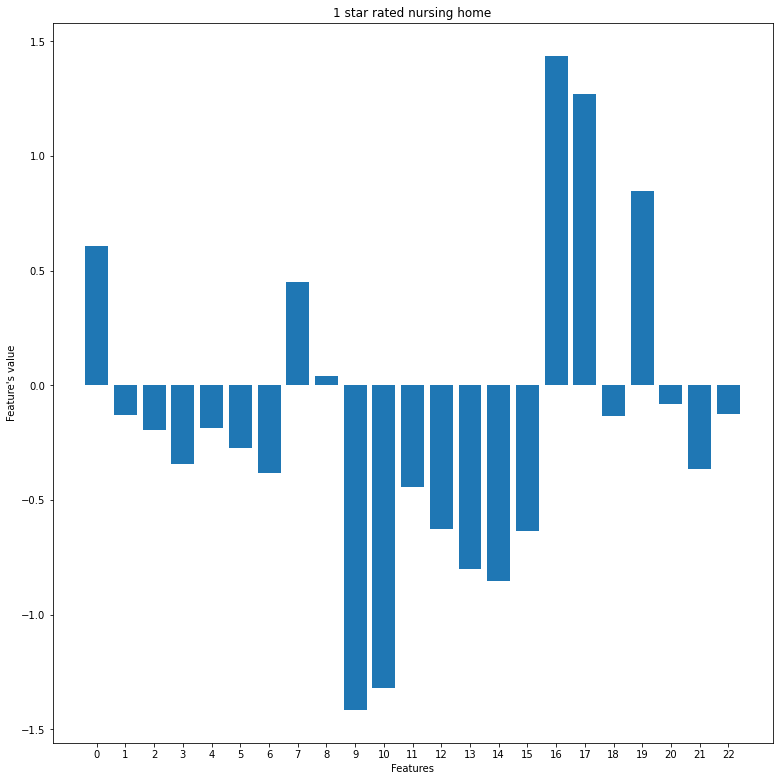

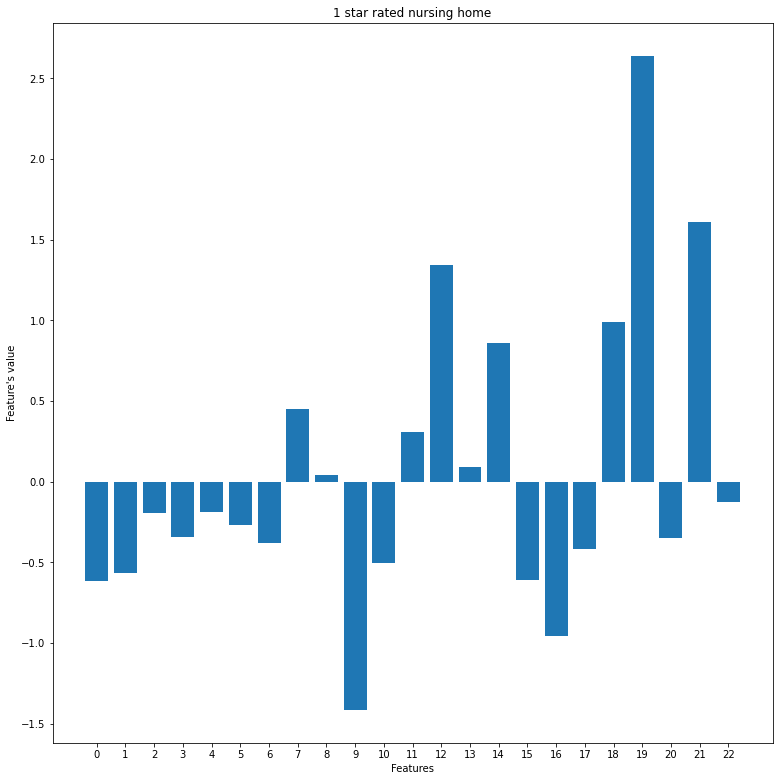

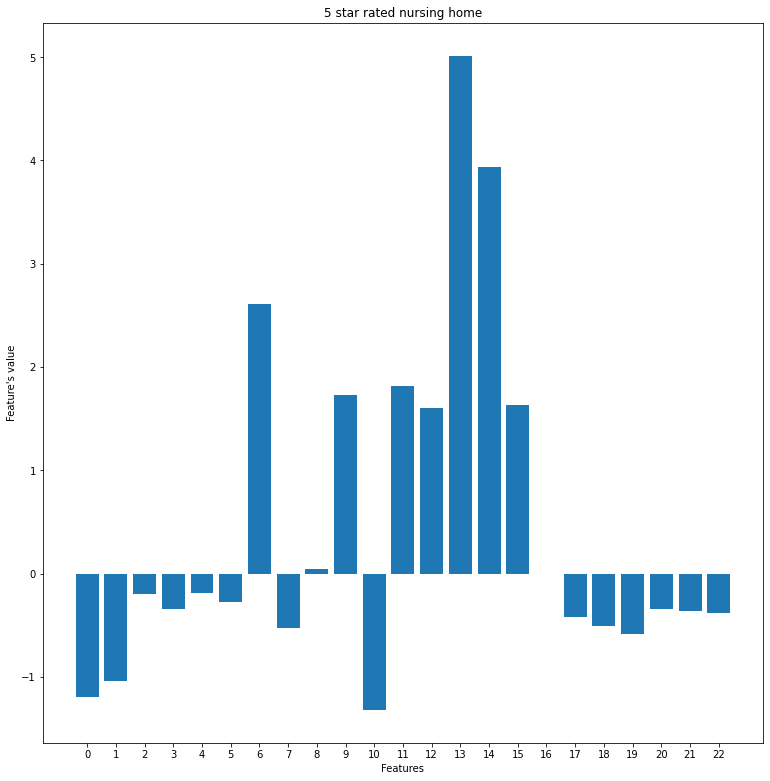

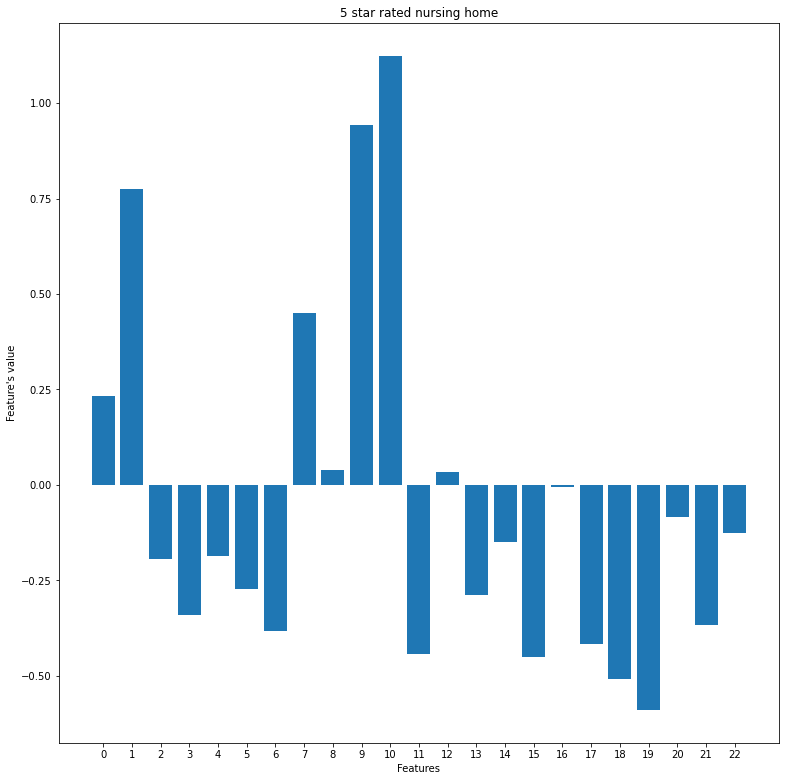

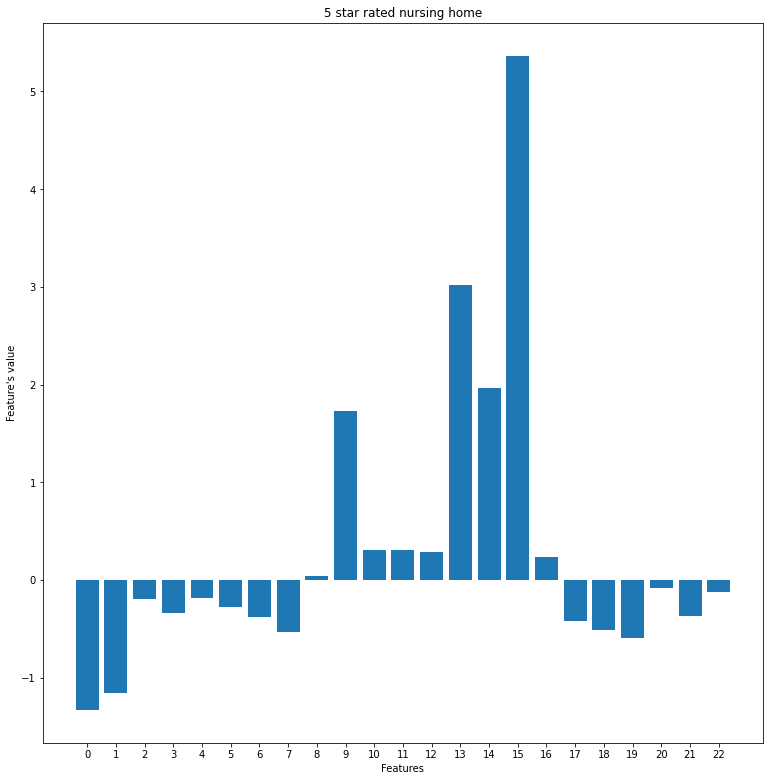

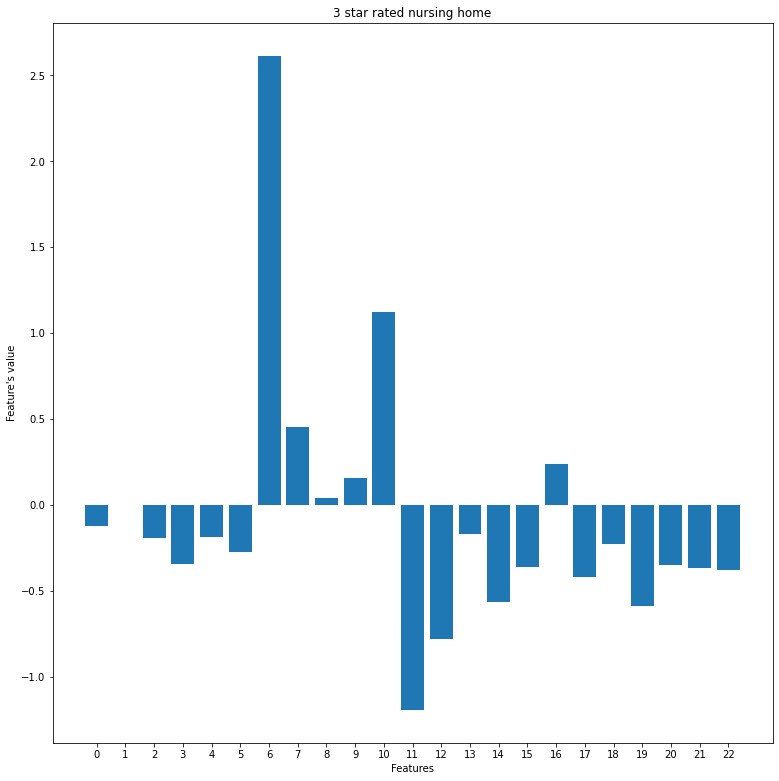

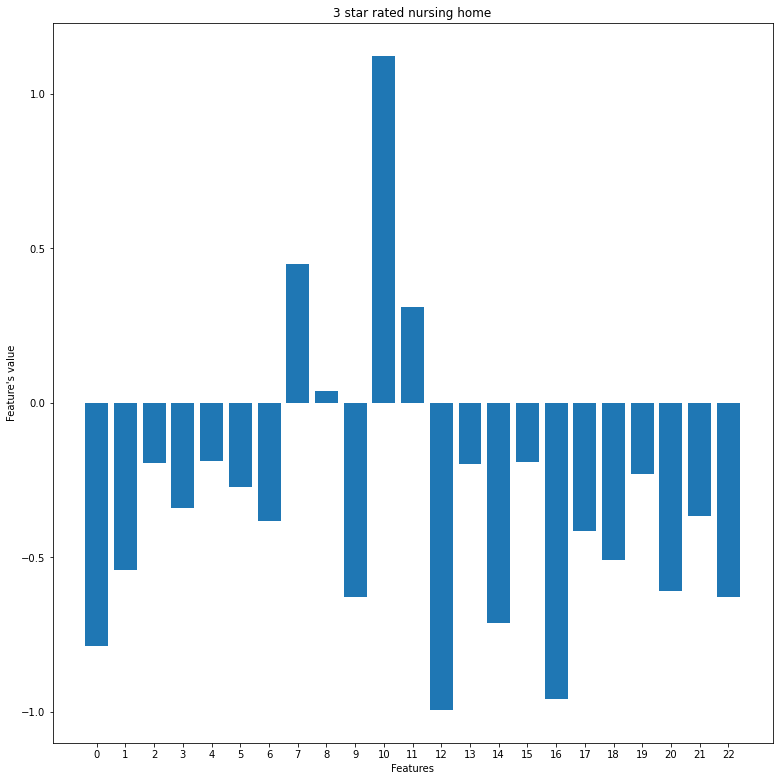

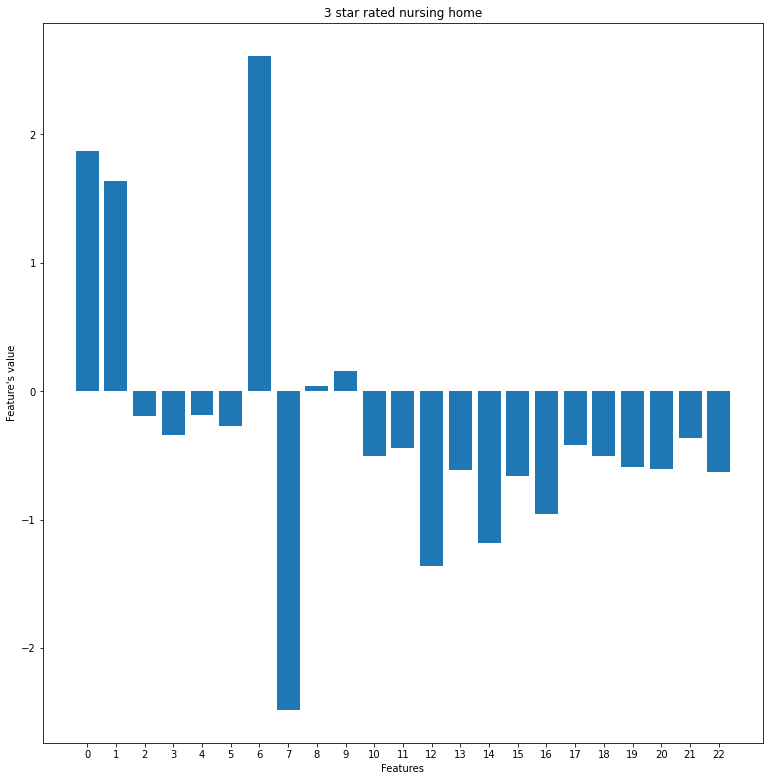

In [189]:
for i in range(9):
    fig=plt.figure(figsize=(10,10))
    axes=fig.add_axes([1,1,1,1])
    axes.bar(columns,x_test[graph_indexes[i]])
    plt.xticks(columns)
    plt.tight_layout()
    if i==0 or i==1 or i==2:
        axes.set_title("1 star rated nursing home")
    elif i==3 or i==4 or i==5:
        axes.set_title("5 star rated nursing home")
    else:
        axes.set_title("3 star rated nursing home")
    plt.xlabel("Features")
    plt.ylabel("Feature's value")
    plt.show()

Column names are too big to fit on the graph properly. Compromise with numbers

In [190]:
labels=[]
for k in reco_system_data.columns:
    if k!='provider_name' and k!='overall_rating':
        labels.append(k + '                                                                                              ')

In [191]:
plot_labels=dict(zip(columns,labels))
print(plot_labels)

{0: 'number_of_certified_beds                                                                                              ', 1: 'average_number_of_residents_per_day                                                                                              ', 2: 'provider_resides_in_hospital                                                                                              ', 3: 'continuing_care_retirement_community                                                                                              ', 4: 'special_focus_status                                                                                              ', 5: 'abuse_icon                                                                                              ', 6: 'most_recent_health_inspection_more_than_2_years_ago                                                                                              ', 7: 'with_a_resident_and_family_council                                                  